In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle
import seaborn as sns
import pydicom as dcm
%matplotlib inline 

ModuleNotFoundError: ignored

In [0]:
#!pip install pydicom - installed the pydicom libraray to visualize the dicom images

     |████████████████████████████████| 7.0MB 2.8MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/GL_Capstone/')

### **Load the class file and the label files**

In [0]:
# the class info file
class_info_df = pd.read_csv('stage_2_detailed_class_info.csv')
    

In [0]:
print("class info has-  rows:",class_info_df.shape[0]," columns:", class_info_df.shape[1])

class info has-  rows: 30227  columns: 2


In [0]:
class_info_df.head(5)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [0]:
#In class detailed info dataset are given the detailed information about the type of positive or negative class associated with a certain patient.

In [0]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(class_info_df)

,Total,Percent
class,0,0.0
patientId,0,0.0


In [0]:
#Class distribution from class detailed info.

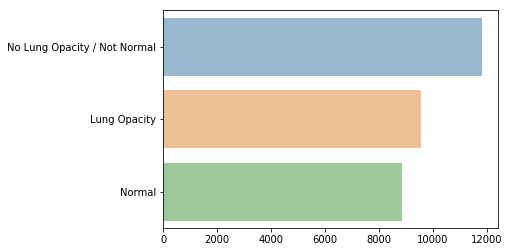

In [0]:
classes = class_info_df['class'].value_counts()
sns.barplot(y=classes.index, x=classes.values, alpha=0.5)

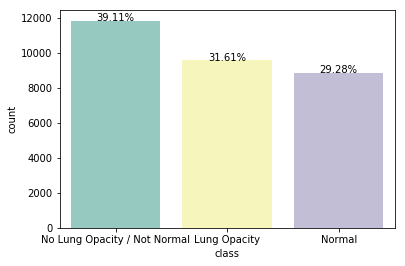

In [0]:
f, ax = plt.subplots(1,1, figsize=(6,4))
total = float(len(class_info_df))
sns.countplot(class_info_df['class'],order = class_info_df['class'].value_counts().index, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 
plt.show()

In [0]:
classes

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [0]:
print("Unique patientId in  train_class_df: ", class_info_df['patientId'].nunique())  

Unique patientId in  train_class_df:  26684


In [0]:
# Read the training label data
train_labels_df = pd.read_csv('stage_2_train_labels.csv')   

In [0]:
print("Train labels has-  rows:",train_labels_df.shape[0]," columns:", train_labels_df.shape[1])

Train labels has-  rows: 30227  columns: 6


In [0]:
train_labels_df.head(5)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [0]:
#In train labels dataset are given the patient ID and the window (x min, y min, width and height of the) containing evidence of pneumonia.

In [0]:
missing_data(train_labels_df)

,Total,Percent
height,20672,68.389188
width,20672,68.389188
y,20672,68.389188
x,20672,68.389188
Target,0,0.000000
patientId,0,0.000000


 **Explore DICOM data**

In [0]:
#samplePatientID = list(train_labels_df[:3].T.to_dict().values())[0]['patientId']
samplePatientID = '0a2c130c-c536-4651-836d-95d07e9a89cf'+'.dcm'
dicom_file_path = os.path.join("Train_Sample/",samplePatientID)
dicom_file_dataset = dcm.read_file(dicom_file_path)
dicom_file_dataset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.8519.1517874337.873072
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0a2c130c-c536-4651-836d-95d07e9a89cf'
(0010, 0020) Patient ID                          LO: '0a2c130c-c536-4651-836d-95d07e9a89cf'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's



We can observe that we do have available some useful information in the DICOM metadata with predictive value, for example:

    Patient sex;
    Patient age;
    Modality;
    Body part examined;
    View position;
    Rows & Columns;
    Pixel Spacing.



In [0]:
def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(PATH,"stage_2_train_images/",patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    plt.show()

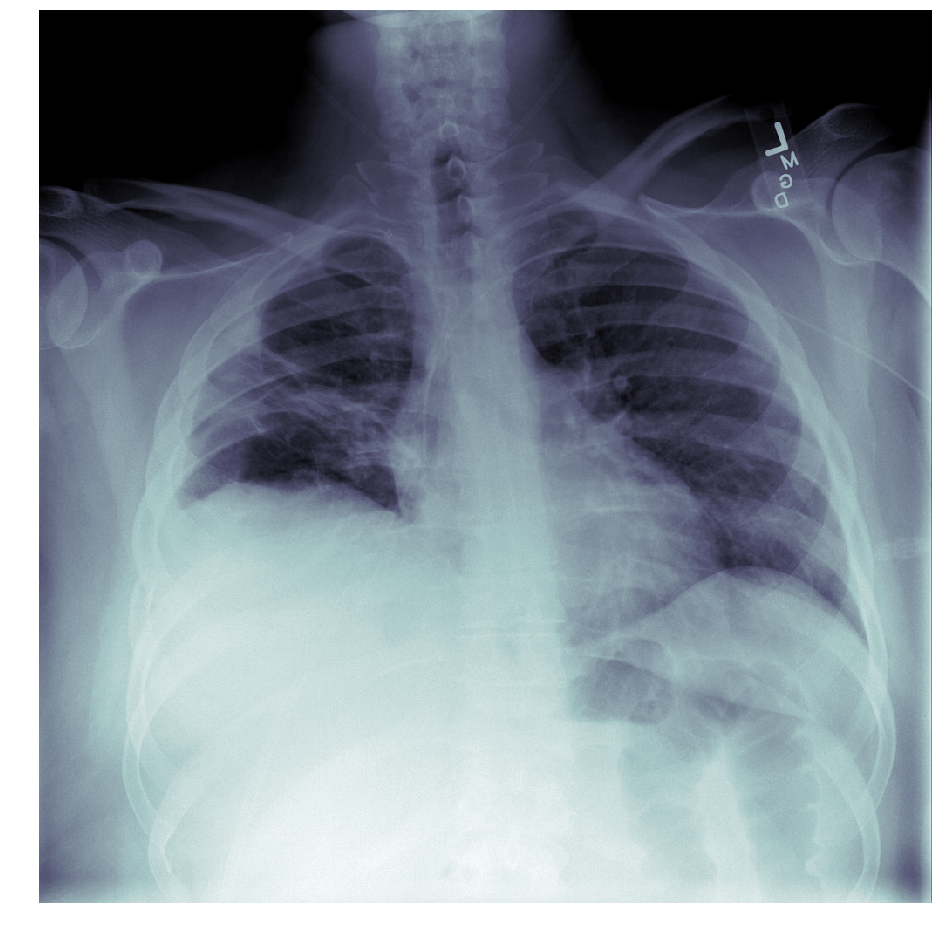

In [0]:
patientImage = samplePatientID
imagePath = dicom_file_path
f, ax = plt.subplots(1,1, figsize=(16,18))
data_row_img_data = dcm.read_file(imagePath)
modality = data_row_img_data.Modality
age = data_row_img_data.PatientAge
sex = data_row_img_data.PatientSex
data_row_img = dcm.dcmread(imagePath)
ax.imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
ax.axis('off')
#ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
       # data_row['patientId'],
       # modality, age, sex, data_row['Target'], data_row['class'], 
       # data_row['x'],data_row['y'],data_row['width'],data_row['height']))
plt.show()

In [0]:
show_dicom_images(train_class_df[train_class_df['Target']==1].sample(9))

In [0]:
def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(PATH,"stage_2_train_images/",patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        rows = train_class_df[train_class_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        color="yellow",alpha = 0.1))   
    plt.show()


In [0]:
show_dicom_images_with_boxes(train_class_df[train_class_df['Target']==1].sample(9))